In [1]:
import pandas as pd
import numpy as np
import glob
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

root_dir = '/oak/stanford/groups/horence/rob/isoform_localizations/'

sys.path.append(os.path.join(root_dir,'scripts'))
import spatial_utils
import plot_utils

In [2]:
spots = pd.read_csv('../processed_data/all_passing_rna_spots.csv')
cells = pd.read_csv('../processed_data/segmented_cell_shapes.csv')

In [4]:
df = pd.read_csv('../sbatch_scripts/20210115_centrality.csv')
df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version
0,10000143038275111136124942858811168393,Adra1b,161,1,centrality,2.779945,-0.718970,0.061207,1.966323,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
1,10000143038275111136124942858811168393,Aqp4,161,1,centrality,3.808437,0.005983,0.192908,3.527979,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
2,10000143038275111136124942858811168393,Bcl11b,161,1,centrality,5.658580,1.310094,0.066685,12.304966,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3,10000143038275111136124942858811168393,Brinp3,161,1,centrality,4.015005,0.151587,0.000000,0.663956,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
4,10000143038275111136124942858811168393,Cdh20,161,3,centrality,3.733510,-0.046831,-0.009072,0.747625,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...


In [6]:
#this version of the script used medians which is good
df.iloc[0]['spatial_utils_code_version']

'b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2cd9dbd8d44036a7a90d'

In [7]:
quantiles_df = pd.read_csv('../processed_data/gene_per_cell_quantiles.csv')
quantiles_df.head()

,target_molecule_name,q10,q20,q30,q40,q50,q60,q70,q80,q90,q100
0,1700022I11Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
1,1810046K07Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0
2,5031425F14Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
3,5730522E02Rik,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
4,Acta2,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,275.0


In [23]:
df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version
0,10000143038275111136124942858811168393,Adra1b,161,1,centrality,2.779945,-0.718970,0.061207,1.966323,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
1,10000143038275111136124942858811168393,Aqp4,161,1,centrality,3.808437,0.005983,0.192908,3.527979,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
2,10000143038275111136124942858811168393,Bcl11b,161,1,centrality,5.658580,1.310094,0.066685,12.304966,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3,10000143038275111136124942858811168393,Brinp3,161,1,centrality,4.015005,0.151587,0.000000,0.663956,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
4,10000143038275111136124942858811168393,Cdh20,161,3,centrality,3.733510,-0.046831,-0.009072,0.747625,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...


In [24]:
filt_df = df[df['cell_id'].isin(filt_cell_ids)]
filt_df

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version
3634,100091009396667473995136644963828192189,Ano4,148,1,centrality,3.498453,0.096826,-0.161092,1.236324,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3635,100091009396667473995136644963828192189,Aqp4,148,4,centrality,1.826704,-0.747120,0.192908,3.527979,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3636,100091009396667473995136644963828192189,Bcl11b,148,1,centrality,0.856606,-1.236853,0.066685,12.304966,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3637,100091009396667473995136644963828192189,Cbln2,148,16,centrality,4.100854,0.400935,0.056899,0.676701,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3638,100091009396667473995136644963828192189,Ccbe1,148,3,centrality,3.305871,-0.000395,-0.057398,0.699000,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
...,...,...,...,...,...,...,...,...,...,...
14615930,99997470167777465101376150817407669505,Trpc6,809,1,centrality,7.265540,0.851261,-0.084399,0.795987,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
14615931,99997470167777465101376150817407669505,Unc5d,809,4,centrality,6.487671,0.467742,0.012659,1.004202,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
14615932,99997470167777465101376150817407669505,Ust,809,5,centrality,7.122807,0.780889,0.064476,0.714415,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
14615933,99997470167777465101376150817407669505,Vtn,809,1,centrality,2.911069,-1.295662,0.038690,140.327895,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...


In [43]:
min_gene_spots

7.0

In [ ]:
#1. Choose a gene and a spot/cell quantile
gene = 'Flrt3'
qt = 'q90'

gene_qts = quantiles_df[quantiles_df['target_molecule_name'].eq(gene)]
min_gene_spots = gene_qts['q90'].values[0]

#2. Filter down to just cell_ids with spot counts for chosen gene >= quantile
gene_counts_per_cell = spots[spots['target_molecule_name'].eq(gene)].groupby('cell_id').size()
filt_cell_ids = gene_counts_per_cell[gene_counts_per_cell >= min_gene_spots].index

#3. Filter the spots using these cell_ids. Include all genes spots
#4. Filter the cells using these cell_ids
#5. Filter the metric df
filt_spots = spots[spots['cell_id'].isin(filt_cell_ids)]
filt_cells = cells[cells['cell_id'].isin(filt_cell_ids)]
filt_df = df[df['cell_id'].isin(filt_cell_ids)]

#6. Re-calculate the gene_median and gene_var cell zscores
filt_df['gene_median_cell_zscore'] = filt_df.groupby('target_molecule_name')['cell_zscore'].transform('median')
filt_df['gene_var_cell_zscore'] = filt_df.groupby('target_molecule_name')['cell_zscore'].transform('std')**2

filt_df.shape

In [46]:
filt_spots[filt_spots['target_molecule_name'].eq(gene)].groupby('cell_id').size().median()

9.0

In [47]:
filt_spots.groupby('cell_id')['target_molecule_name'].unique().apply(len).median()

106.0

In [30]:
filt_df[filt_df['target_molecule_name'].eq(gene)]['gene_var_cell_zscore'].unique()

array([0.16204051])

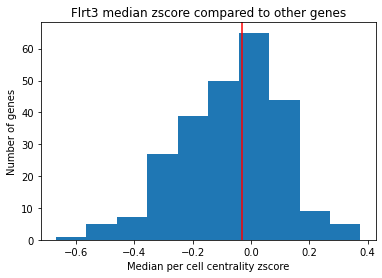

In [49]:
gene_median = filt_df[filt_df['target_molecule_name'].eq(gene)]['gene_median_cell_zscore'].values[0]

filt_df.drop_duplicates('target_molecule_name')['gene_median_cell_zscore'].plot.hist()
plt.axvline(gene_median,color='r')
plt.xlabel('Median per cell centrality zscore')
plt.ylabel('Number of genes')
plt.title('{} median zscore compared to other genes'.format(gene))
plt.show()
plt.close()

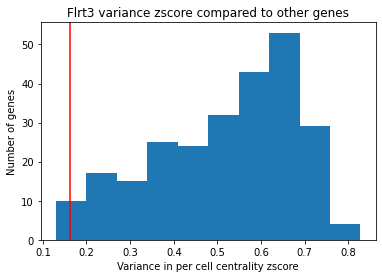

In [48]:
gene_var = filt_df[filt_df['target_molecule_name'].eq(gene)]['gene_var_cell_zscore'].values[0]

filt_df.drop_duplicates('target_molecule_name')['gene_var_cell_zscore'].plot.hist()
plt.axvline(gene_var,color='r')
plt.xlabel('Variance in per cell centrality zscore')
plt.ylabel('Number of genes')
plt.title('{} variance zscore compared to other genes'.format(gene))
plt.show()
plt.close()

In [54]:
filt_df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore,spatial_utils_code_version
3634,100091009396667473995136644963828192189,Ano4,148,1,centrality,3.498453,0.096826,-0.151190,0.410298,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3635,100091009396667473995136644963828192189,Aqp4,148,4,centrality,1.826704,-0.747120,0.279758,0.623522,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3636,100091009396667473995136644963828192189,Bcl11b,148,1,centrality,0.856606,-1.236853,0.059502,0.288701,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3637,100091009396667473995136644963828192189,Cbln2,148,16,centrality,4.100854,0.400935,0.076858,0.239465,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...
3638,100091009396667473995136644963828192189,Ccbe1,148,3,centrality,3.305871,-0.000395,-0.055908,0.429482,b2a74e7616ec896e1a92651a30a1c06768c5feb71bba2c...


In [67]:
var_by_num_spots['is_Flrt3'].value_counts()

False    251
True       1
Name: is_Flrt3, dtype: int64

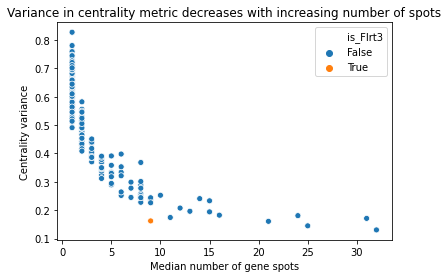

In [70]:
var_by_num_spots = (
    filt_df.groupby(
        ['target_molecule_name','gene_var_cell_zscore']
    )
    ['num_gene_spots']
    .median()
    .reset_index()
)

var_by_num_spots['is_{}'.format(gene)] = False
var_by_num_spots.loc[
    var_by_num_spots['target_molecule_name'].eq(gene),
    'is_{}'.format(gene)
] = True


sns.scatterplot(
    x = 'num_gene_spots',
    y = 'gene_var_cell_zscore',
    hue = 'is_{}'.format(gene),
    data = var_by_num_spots,
)
plt.title('Variance in centrality metric decreases with increasing number of spots')
plt.xlabel('Median number of gene spots')
plt.ylabel('Centrality variance')
plt.show()
plt.close()

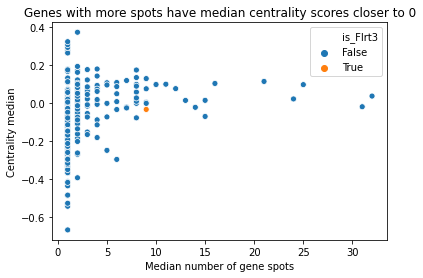

In [72]:
med_by_num_spots = (
    filt_df.groupby(
        ['target_molecule_name','gene_median_cell_zscore']
    )
    ['num_gene_spots']
    .median()
    .reset_index()
)

med_by_num_spots['is_{}'.format(gene)] = False
med_by_num_spots.loc[
    med_by_num_spots['target_molecule_name'].eq(gene),
    'is_{}'.format(gene)
] = True


sns.scatterplot(
    x = 'num_gene_spots',
    y = 'gene_median_cell_zscore',
    hue = 'is_{}'.format(gene),
    data = med_by_num_spots,
)
plt.title('Genes with more spots have median centrality scores closer to 0')
plt.xlabel('Median number of gene spots')
plt.ylabel('Centrality median')
plt.show()
plt.close()

0


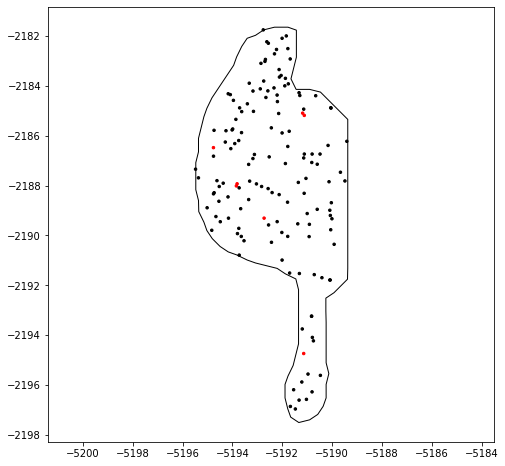

In [32]:
spot_colors = {gene: 'r'}

for i,cell_id in enumerate(filt_cell_ids):
    print(i)
    sub_spots = filt_spots[filt_spots['cell_id'].eq(cell_id)]
    sub_cells = filt_cells[filt_cells['cell_id'].eq(cell_id)]

    fig,ax = plot_utils.plot_spot_cells(sub_spots, sub_cells, spot_colors)
    plt.show()
    plt.close()
    break